In [1]:
import os
from google.colab import userdata

os.environ["ROBOFLOW_API_KEY"] = userdata.get("ROBOFLOW_API_KEY")

In [2]:
!nvidia-smi

Mon Aug 25 15:39:52 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   49C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import os

HOME = os.getcwd()
print("HOME:", HOME)

HOME: /content


In [4]:
!pip install -q gdown
!pip install -q inference-gpu
!pip install -q git+https://github.com/roboflow/supervision.git
!pip install -q git+https://github.com/roboflow/sports.git@feat/basketball

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 6.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.1/190.1 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
import os

os.environ["ONNXRUNTIME_EXECUTION_PROVIDERS"] = "[CUDAExecutionProvider]"

In [6]:
!gdown --folder https://drive.google.com/drive/folders/1eDJYqQ77Fytz15tKGdJCMeYSgmoQ-2-H
!gdown --folder https://drive.google.com/drive/folders/1RBjpI5Xleb58lujeusxH0W5zYMMA4ytO


Retrieving folder contents
Processing file 1GYxJGG8_OT5wlHxcYjUb62P2rjHeTg7p boston-celtics-new-york-knicks-game-1-q1-01.54-01.48.mp4
Processing file 1Gm-QSkfXngzEnkrQEdE1HsLPG3cU-KCV boston-celtics-new-york-knicks-game-1-q1-03.16-03.11.mp4
Processing file 1It3wz3eoGcjo6tI9OGUt3X69ZK6x5SNK boston-celtics-new-york-knicks-game-1-q1-04.28-04.20.mp4
Processing file 1hx7_rJAmgBjt6PgHH8wh49OwUh2Lhe9f boston-celtics-new-york-knicks-game-1-q1-04.44-04.39.mp4
Processing file 1fPEw_w51nNQeBHh_GYhRyThVg71V1trn boston-celtics-new-york-knicks-game-1-q1-05.13-05.09.mp4
Processing file 1zwnAE4jHVI0qH7ioDFnzX98XtOocAUbH boston-celtics-new-york-knicks-game-1-q1-06.00-05.54.mp4
Processing file 1wQMSO-C4jOm6BBIVUuJ_6Uqf0QLdbJHD boston-celtics-new-york-knicks-game-1-q1-07.41-07.34.mp4
Processing file 1w9e1zCZtXtOmi6C4m-1BJJzTpa3znkbB boston-celtics-new-york-knicks-game-1-q2-08.09-08.03.mp4
Processing file 1zaltcB_-j8Pzxh8rBuvAV2o0Ngf3IX0I boston-celtics-new-york-knicks-game-1-q2-08.43-08.38.mp4
Processing

In [7]:
from pathlib import Path

SOURCE_VIDEO_PATH = Path(HOME) / "boston-celtics-new-york-knicks-game-1/boston-celtics-new-york-knicks-game-1-q1-03.16-03.11.mp4"

In [8]:
!pip install 'inference[transformers]'

  Using cached supervision-0.25.1-py3-none-any.whl.metadata (14 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.5/163.5 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.1/411.1 kB 13.5 MB/s eta 0:00:00
Using cached supervision-0.25.1-py3-none-any.whl 

In [ ]:
!pip install 'inference[sam]'

In [ ]:
!pip install 'inference[clip]'

In [ ]:
!pip install 'inference[gaze]'

In [ ]:
!pip install 'inference[grounding-dino]'

In [ ]:
!pip install 'inference[yolo-world]'!

In [ ]:
!pip install 'inference[transformers]'

In [6]:
import numpy as np
import supervision as sv

from tqdm import tqdm
from inference import get_model
from google.colab import userdata

from dataclasses import dataclass
from collections import deque
from typing import Union, Sequence, Optional, List

from sports import MeasurementUnit, ViewTransformer
from sports.basketball import (
    CourtConfiguration,
    League,
    draw_court,
    draw_made_and_miss_on_court,
    ShotEventTracker,
    ShotEvent,
    ShotType
)

ModelDependencyMissing: Your `inference` configuration does not support Qwen2.5-VL model. Use pip install 'inference[transformers]' to install missing requirements.To suppress this warning, set QWEN_2_5_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[sam]' to install missing requirements.To suppress this warning, set CORE_MODEL_SAM_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support SAM2 model. Use pip install 'inference[sam]' to install missing requirements.To suppress this warning, set CORE_MODEL_SAM2_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support CLIP model. Use pip install 'inference[clip]' to install missing requirements.To suppress this warning, set CORE_MODEL_CLIP_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support Gaze Detection model. Use pip install 'inference[gaze]' to install mi

## ball, number, player, referee and basket detection

**Note:** The model used in this notebook detects the following classes: `ball`, `ball-in-basket`, `number`, `player`, `player-in-possession`, `player-jump-shot`, `player-layup-dunk`, `player-shot-block`, `referee`, and `rim`. These classes enable tracking of game events, player actions, and ball location for basketball analytics.

In [ ]:
PLAYER_DETECTION_MODEL_ID = "basketball-player-detection-3-ycjdo/4"
PLAYER_DETECTION_MODEL = get_model(model_id=PLAYER_DETECTION_MODEL_ID, api_key =  userdata.get("ROBOFLOW_API_KEY"))

COLOR = sv.ColorPalette.from_hex([
    "#ffff00", "#ff9b00", "#ff66ff", "#3399ff", "#ff66b2", "#ff8080",
    "#b266ff", "#9999ff", "#66ffff", "#33ff99", "#66ff66", "#99ff00"
])

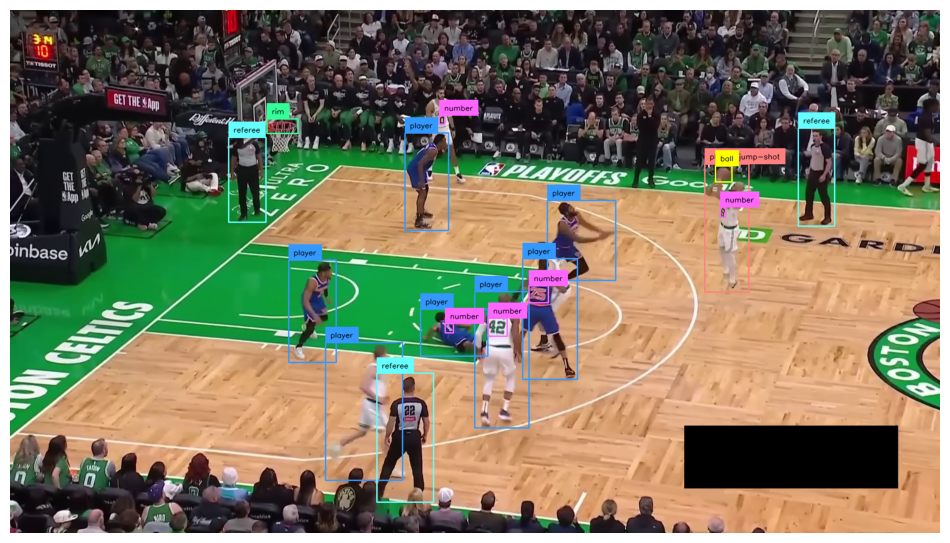

In [ ]:
box_annotator = sv.BoxAnnotator(color=COLOR, thickness=2)
label_annotator = sv.LabelAnnotator(color=COLOR, text_color=sv.Color.BLACK)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH, start=65, iterative_seek=True)
frame = next(frame_generator)

result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.35)[0]
detections = sv.Detections.from_inference(result)

annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(
    scene=annotated_frame,
    detections=detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=detections)

sv.plot_image(annotated_frame)

## detect jump-shots

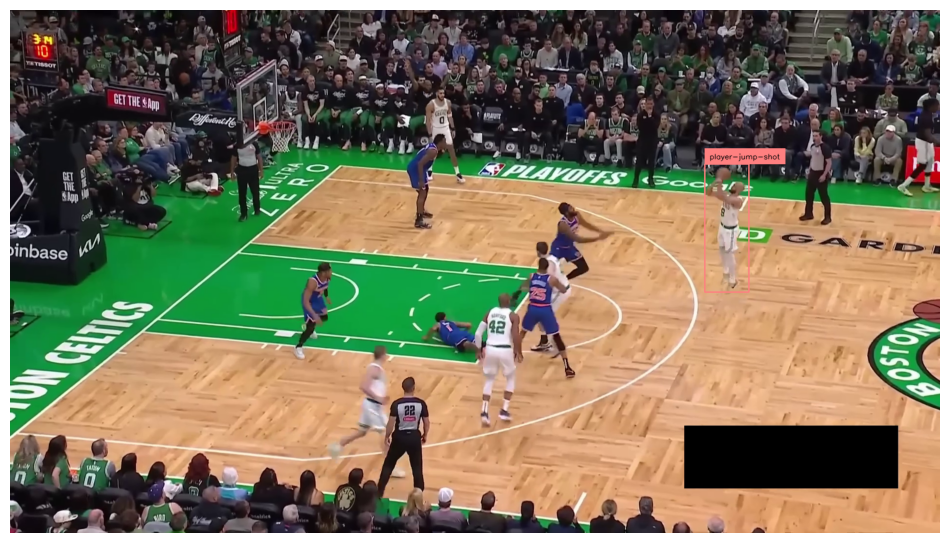

In [ ]:
box_annotator = sv.BoxAnnotator(color=COLOR, thickness=2)
label_annotator = sv.LabelAnnotator(color=COLOR, text_color=sv.Color.BLACK)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH, start=65, iterative_seek=True)
frame = next(frame_generator)

result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.35)[0]
detections = sv.Detections.from_inference(result)
detections = detections[detections.class_id == 5]

annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(
    scene=annotated_frame,
    detections=detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=detections)

sv.plot_image(annotated_frame)

## visualize jump-shots

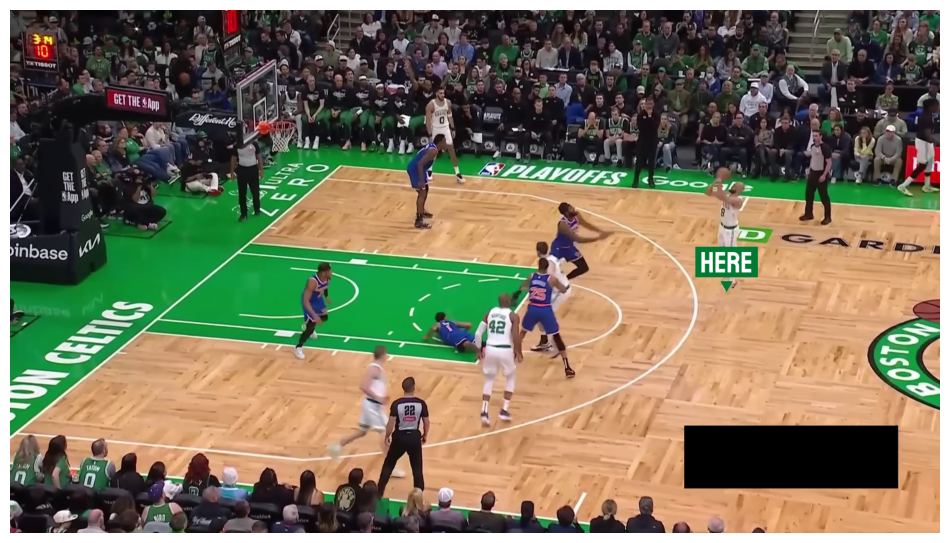

In [ ]:
COLOR = sv.Color.from_hex('#007A33')
TEXT_COLOR = sv.Color.WHITE

triangle_annotator = sv.TriangleAnnotator(
    color=COLOR,
    base=25,
    height=21,
    color_lookup=sv.ColorLookup.INDEX
)
text_annotator = sv.RichLabelAnnotator(
    font_path=f"{HOME}/fonts/Staatliches-Regular.ttf",
    font_size=60,
    color=COLOR,
    text_color=TEXT_COLOR,
    text_offset=(0, -30),
    color_lookup=sv.ColorLookup.INDEX,
    text_position=sv.Position.TOP_CENTER
)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH, start=65, iterative_seek=True)
frame = next(frame_generator)

result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.35)[0]
detections = sv.Detections.from_inference(result)
detections = detections[detections.class_id == 5]
xy = detections.get_anchors_coordinates(anchor=sv.Position.BOTTOM_CENTER)

# small hack to conver points into detections
xyxy = sv.pad_boxes(np.hstack((xy, xy)), px=1, py=1)
detections = sv.Detections(xyxy=xyxy)

labels = ["here"] * len(detections)

annotated_frame = frame.copy()
annotated_frame = triangle_annotator.annotate(
    scene=annotated_frame,
    detections=detections
)
annotated_frame = text_annotator.annotate(
    scene=annotated_frame,
    detections=detections,
    labels=labels
)

sv.plot_image(annotated_frame)

## detect basketball court keypoints

In [ ]:
COURT_DETECTION_MODEL_ID = "basketball-court-detection-2/14"
COURT_DETECTION_MODEL = get_model(model_id=COURT_DETECTION_MODEL_ID, api_key =  userdata.get("ROBOFLOW_API_KEY"))

MAGENTA_COLOR = sv.Color.from_hex('#FF1493')
CYAN_COLOR = sv.Color.from_hex('#00BFFF')

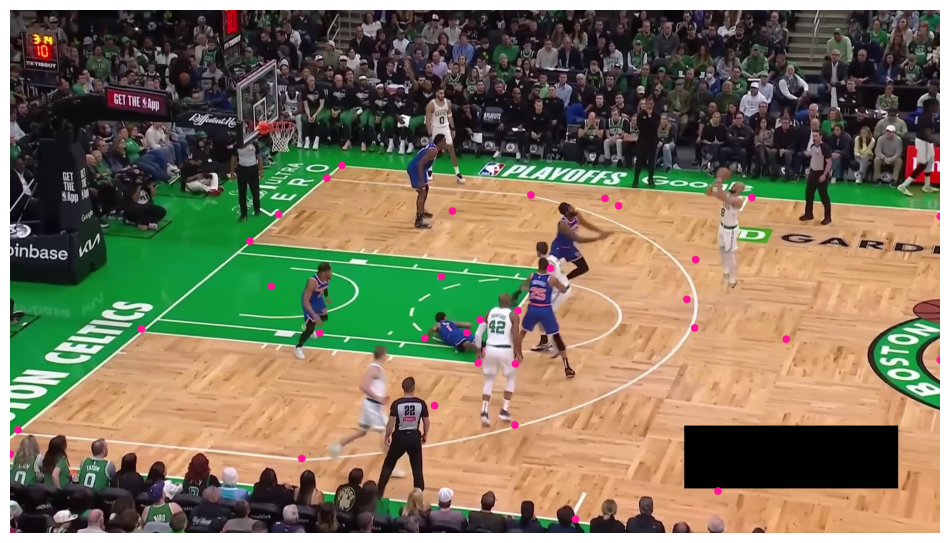

In [ ]:
vertex_annotator = sv.VertexAnnotator(color=MAGENTA_COLOR, radius=8)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH, start=65, iterative_seek=True)
frame = next(frame_generator)

result = COURT_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
key_points = sv.KeyPoints.from_inference(result)

annotated_frame = frame.copy()
annotated_frame = vertex_annotator.annotate(
    scene=annotated_frame,
    key_points=key_points)

sv.plot_image(annotated_frame)

## detect basketball court keypoints with high confidence

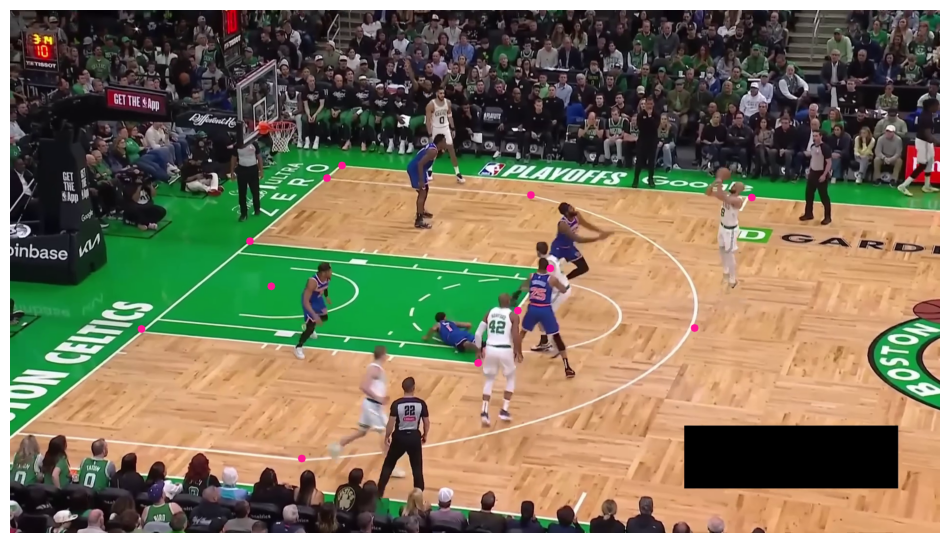

In [ ]:
vertex_annotator = sv.VertexAnnotator(color=MAGENTA_COLOR, radius=8)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH, start=65, iterative_seek=True)
frame = next(frame_generator)

result = COURT_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
key_points = sv.KeyPoints.from_inference(result)
key_points = key_points[:, key_points.confidence[0] > 0.5]

annotated_frame = frame.copy()
annotated_frame = vertex_annotator.annotate(
    scene=annotated_frame,
    key_points=key_points)

sv.plot_image(annotated_frame)

## mark jump-shot location

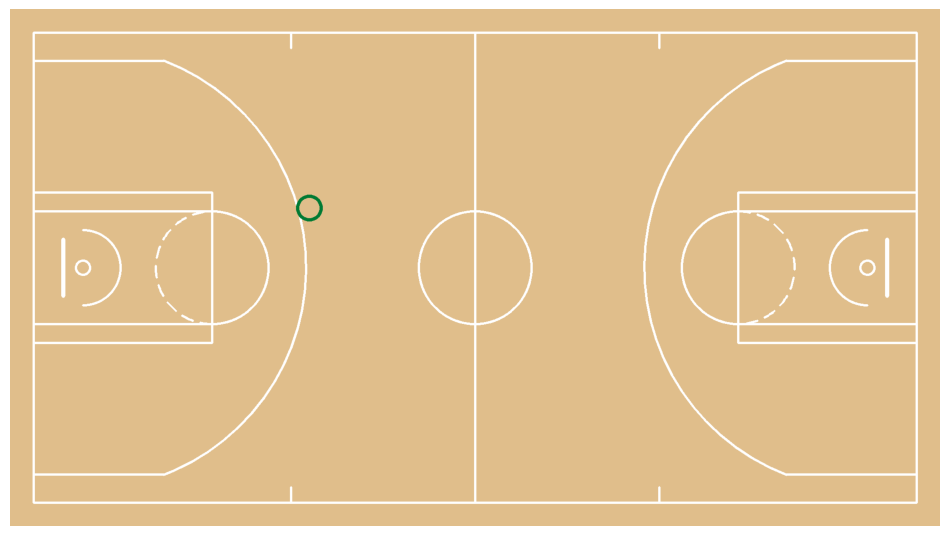

In [ ]:
CONFIG = CourtConfiguration(league=League.NBA, measurement_unit=MeasurementUnit.FEET)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH, start=65, iterative_seek=True)
frame = next(frame_generator)

# detect court keypoints
court_result = COURT_DETECTION_MODEL.infer(frame, confidence=0.35)[0]
key_points = sv.KeyPoints.from_inference(court_result)

keypoint_mask = key_points.confidence[0] > 0.5
have_enough_points = np.count_nonzero(keypoint_mask) >= 4

if have_enough_points:
    court_vertices_masked = np.array(CONFIG.vertices)[keypoint_mask]
    detected_on_image = key_points[:, keypoint_mask].xy[0]

    image_to_court = ViewTransformer(
        source=detected_on_image,
        target=court_vertices_masked,
    )

    # detect jump-shot
    result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.35)[0]
    detections = sv.Detections.from_inference(result)
    image_xy = detections[detections.class_id == 5].get_anchors_coordinates(anchor=sv.Position.BOTTOM_CENTER)

    if len(image_xy) > 0:
        court_xy = image_to_court.transform_points(points=image_xy)

        court = draw_made_and_miss_on_court(
            config=CONFIG,
            made_xy=court_xy,
            made_size=25,
            made_color=sv.Color.from_hex("#007A33"),
            made_thickness=6,
            line_thickness=4
        )

        sv.plot_image(court)

## detect shot events

[{'event': 'START', 'frame': 64, 'type': 'JUMP'}]


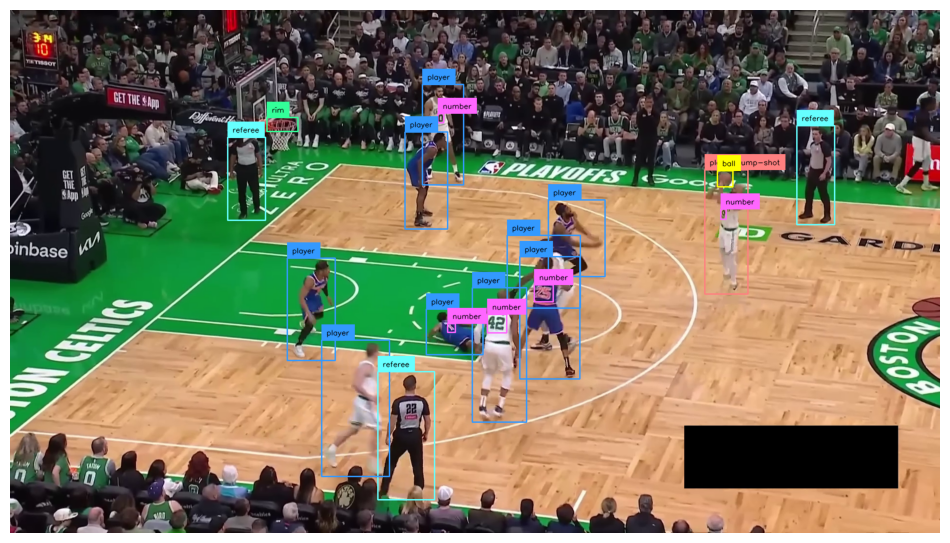

[{'event': 'MISSED', 'frame': 115, 'type': 'JUMP'}]


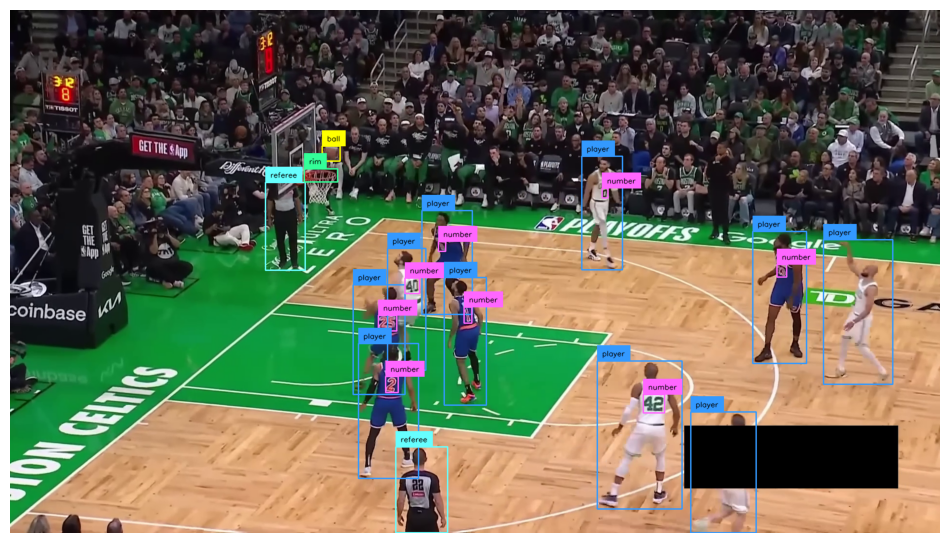

[{'event': 'START', 'frame': 120, 'type': 'LAYUP'}]


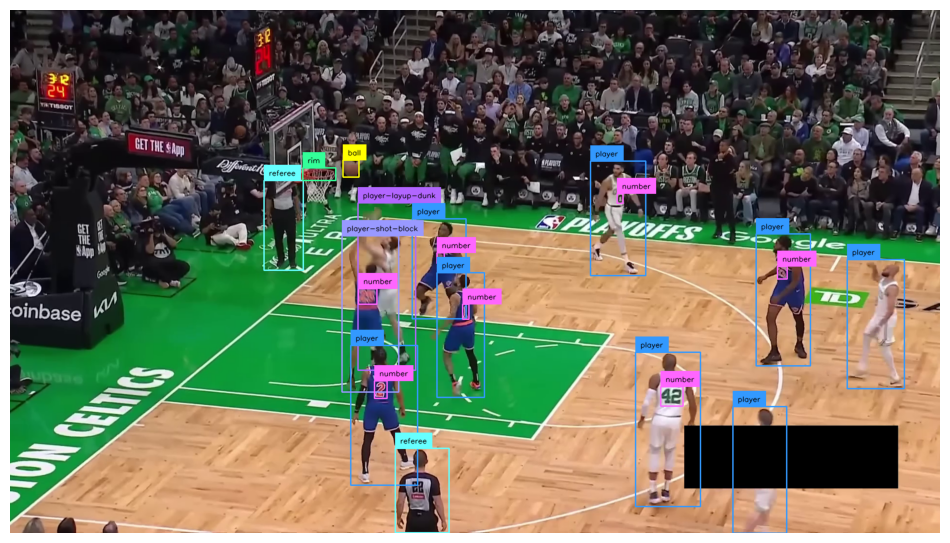

[{'event': 'MADE', 'frame': 135, 'type': 'LAYUP'}]


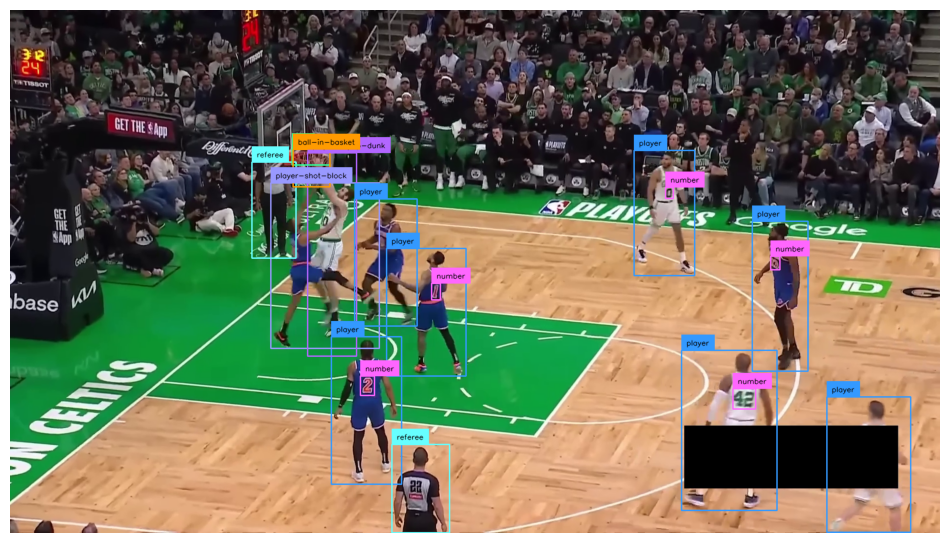

In [ ]:
CONFIDENCE_THRESHOLD = 0.3
IOU_THRESHOLD = 0.7

BALL_IN_BASKET_CLASS_ID = 1
JUMP_SHOT_CLASS_ID = 5
LAYUP_DUNK_CLASS_ID = 6

COLOR = sv.ColorPalette.from_hex([
    "#ffff00", "#ff9b00", "#ff66ff", "#3399ff", "#ff66b2", "#ff8080",
    "#b266ff", "#9999ff", "#66ffff", "#33ff99", "#66ff66", "#99ff00"
])

box_annotator = sv.BoxAnnotator(color=COLOR, thickness=2)
label_annotator = sv.LabelAnnotator(color=COLOR, text_color=sv.Color.BLACK)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

shot_event_tracker = ShotEventTracker(
    reset_time_frames=int(video_info.fps * 1.7),
    minimum_frames_between_starts=int(video_info.fps * 0.5),
    cooldown_frames_after_made=int(video_info.fps * 0.5),
)

for frame_index, frame in enumerate(frame_generator):
    result = PLAYER_DETECTION_MODEL.infer(
        frame,
        confidence=CONFIDENCE_THRESHOLD,
        iou_threshold=IOU_THRESHOLD,
    )[0]
    detections = sv.Detections.from_inference(result)

    has_jump_shot = len(detections[detections.class_id == JUMP_SHOT_CLASS_ID]) > 0
    has_layup_dunk = len(detections[detections.class_id == LAYUP_DUNK_CLASS_ID]) > 0
    has_ball_in_basket = len(detections[detections.class_id == BALL_IN_BASKET_CLASS_ID]) > 0

    events = shot_event_tracker.update(
        frame_index=frame_index,
        has_jump_shot=has_jump_shot,
        has_layup_dunk=has_layup_dunk,
        has_ball_in_basket=has_ball_in_basket,
    )

    if events:
        print(events)

        annotated_frame = frame.copy()
        annotated_frame = box_annotator.annotate(
            scene=annotated_frame,
            detections=detections)
        annotated_frame = label_annotator.annotate(
            scene=annotated_frame,
            detections=detections)

        sv.plot_image(annotated_frame)

## end-to-end multi-video processing

In [ ]:
CONFIG = CourtConfiguration(league=League.NBA, measurement_unit=MeasurementUnit.FEET)

In [ ]:
COLOR = sv.ColorPalette.from_hex(['#007A33', '#006BB6'])
TEXT_COLOR = sv.Color.WHITE

triangle_annotator = sv.TriangleAnnotator(
    color=COLOR,
    base=25,
    height=21,
    color_lookup=sv.ColorLookup.CLASS
)
text_annotator = sv.RichLabelAnnotator(
    font_path=f"{HOME}/fonts/Staatliches-Regular.ttf",
    font_size=60,
    color=COLOR,
    text_color=TEXT_COLOR,
    text_offset=(0, -30),
    color_lookup=sv.ColorLookup.CLASS,
    text_position=sv.Position.TOP_CENTER
)

triangle_annotator_missed = sv.TriangleAnnotator(
    color=sv.Color.from_hex("#850101"),
    base=25,
    height=21,
    color_lookup=sv.ColorLookup.CLASS
)
text_annotator_missed = sv.RichLabelAnnotator(
    font_path=f"{HOME}/fonts/Staatliches-Regular.ttf",
    font_size=60,
    color=sv.Color.from_hex("#850101"),
    text_color=TEXT_COLOR,
    text_offset=(0, -30),
    color_lookup=sv.ColorLookup.CLASS,
    text_position=sv.Position.TOP_CENTER
)

In [ ]:
class KeyPointsSmoother:
    def __init__(self, length: int):
        self.length = length
        self.buffer = deque(maxlen=length)

    def update(
        self,
        xy: np.ndarray,
        confidence: Optional[np.ndarray] = None,
        conf_threshold: float = 0.0,
    ) -> np.ndarray:
        assert xy.ndim == 3 and xy.shape[0] == 1
        xy_f = xy.astype(np.float32, copy=True)

        if confidence is not None:
            assert confidence.shape[:2] == xy.shape[:2]
            mask = (confidence >= conf_threshold)[..., None]
            xy_f = np.where(mask, xy_f, np.nan)

        self.buffer.append(xy_f)
        stacked = np.stack(self.buffer, axis=0)

        if np.isnan(stacked).any():
            mean_xy = np.nanmean(stacked, axis=0)
        else:
            mean_xy = stacked.mean(axis=0)

        return mean_xy

In [ ]:
@dataclass
class Shot:
    x: float
    y: float
    distance: float
    result: bool
    team: int

In [ ]:
def euclidean_distance(
    start_point: Union[Sequence[float], np.ndarray],
    end_point: Union[Sequence[float], np.ndarray]
) -> float:
    start_point_array = np.asarray(start_point, dtype=float)
    end_point_array = np.asarray(end_point, dtype=float)

    if start_point_array.shape != (2,) or end_point_array.shape != (2,):
        raise ValueError("Both points must have shape (2,).")

    return float(np.linalg.norm(end_point_array - start_point_array))

def extract_made(shots: list[Shot]):
    return [shot for shot in shots if shot.result]

def extract_xy(shots: list[Shot]):
    return np.array([[shot.x, shot.y] for shot in shots], dtype=float)

def extract_class_id(shots: list[Shot]):
    return np.array([shot.team for shot in shots], dtype=int)

def extract_label(shots: list[Shot]):
    return np.array([f"{shot.distance:.2f} ft" for shot in shots], dtype=str)

In [ ]:
SOURCE_VIDEO_DIR = Path(HOME) / "boston-celtics-new-york-knicks-game-1"

SOURCE_VIDEO_NAMES = [
    "boston-celtics-new-york-knicks-game-1-q1-03.16-03.11.mp4",
    "boston-celtics-new-york-knicks-game-1-q1-04.44-04.39.mp4",
    "boston-celtics-new-york-knicks-game-1-q1-06.00-05.54.mp4",
    "boston-celtics-new-york-knicks-game-1-q1-07.41-07.34.mp4"
]

SOURCE_VIDEO_PATHS = [
    SOURCE_VIDEO_DIR / video_name
    for video_name
    in SOURCE_VIDEO_NAMES
]

In [ ]:
KEYPOINT_CONFIDENCE_THRESHOLD = 0.5
DETECTION_CONFIDENCE = 0.3
CONFIDENCE_THRESHOLD = 0.3
IOU_THRESHOLD = 0.7

BALL_IN_BASKET_CLASS_ID = 1
JUMP_SHOT_CLASS_ID = 5
LAYUP_DUNK_CLASS_ID = 6

BALL_IN_BASKET_MIN_CONSECUTIVE_FRAMES = 2
JUMP_SHOT_MIN_CONSECUTIVE_FRAMES = 3
LAYUP_DUNK_MIN_CONSECUTIVE_FRAMES = 3

shots: List[Shot] = []

COURT_SCALE = 20
COURT_PADDING = 50
COURT_LINE_THICKNESS = 4
court_base = draw_court(
    config=CONFIG,
    scale=COURT_SCALE,
    padding=COURT_PADDING,
    line_thickness=COURT_LINE_THICKNESS,
)
court_h, court_w = court_base.shape[:2]

for video_path in tqdm(SOURCE_VIDEO_PATHS, desc="Videos", position=0):

    target_video_path = (
        video_path.parent / f"{video_path.stem}-markers{video_path.suffix}"
    )
    target_video_compressed_path = (
        target_video_path.parent
        / f"{target_video_path.stem}-compressed{target_video_path.suffix}"
    )

    target_court_video_path = (
        video_path.parent / f"{video_path.stem}-court{video_path.suffix}"
    )
    target_court_video_compressed_path = (
        target_court_video_path.parent
        / f"{target_court_video_path.stem}-compressed"
        f"{target_court_video_path.suffix}"
    )

    video_info = sv.VideoInfo.from_video_path(str(video_path))
    total_frames = getattr(
        video_info, "total_frames", getattr(video_info, "frame_count", None)
    )
    frame_generator = sv.get_video_frames_generator(str(video_path))

    court_video_info = sv.VideoInfo(
        width=court_w,
        height=court_h,
        fps=video_info.fps,
        total_frames=total_frames,
    )

    shot_event_tracker = ShotEventTracker(
        reset_time_frames=int(video_info.fps * 1.7),
        minimum_frames_between_starts=int(video_info.fps * 0.5),
        cooldown_frames_after_made=int(video_info.fps * 0.5),
    )

    smoother = KeyPointsSmoother(length=3)
    shot_in_progress_xy: Optional[np.ndarray] = None

    with sv.VideoSink(str(target_video_path), video_info) as sink, \
         sv.VideoSink(str(target_court_video_path), court_video_info) as court_sink:

        for frame_index, frame in tqdm(
            enumerate(frame_generator),
            total=int(total_frames) if total_frames else None,
            desc=f"Frames: {video_path.name}",
            position=1,
            leave=False,
        ):
            # ================= Player detections and state ================

            player_result = PLAYER_DETECTION_MODEL.infer(
                frame,
                confidence=CONFIDENCE_THRESHOLD,
                iou_threshold=IOU_THRESHOLD,
            )[0]
            player_detections = sv.Detections.from_inference(player_result)

            has_jump_shot = (
                len(player_detections[
                    player_detections.class_id == JUMP_SHOT_CLASS_ID
                ]) > 0
            )
            has_layup_dunk = (
                len(player_detections[
                    player_detections.class_id == LAYUP_DUNK_CLASS_ID
                ]) > 0
            )
            has_ball_in_basket = (
                len(player_detections[
                    player_detections.class_id == BALL_IN_BASKET_CLASS_ID
                ]) > 0
            )

            events = shot_event_tracker.update(
                frame_index=frame_index,
                has_jump_shot=has_jump_shot,
                has_layup_dunk=has_layup_dunk,
                has_ball_in_basket=has_ball_in_basket,
            )

            # ================= Court keypoints and transforms =============

            court_result = COURT_DETECTION_MODEL.infer(
                frame, confidence=DETECTION_CONFIDENCE
            )[0]
            key_points = sv.KeyPoints.from_inference(court_result)
            key_points.xy = smoother.update(xy=key_points.xy, confidence=key_points.confidence, conf_threshold=0.5)

            key_mask = key_points.confidence[0] > KEYPOINT_CONFIDENCE_THRESHOLD
            have_enough_points = np.count_nonzero(key_mask) >= 4

            if have_enough_points:
                court_vertices_masked = np.array(CONFIG.vertices)[key_mask]
                detected_on_image = key_points[:, key_mask].xy[0]

                image_to_court = ViewTransformer(
                    source=detected_on_image,
                    target=court_vertices_masked,
                )
                court_to_image = ViewTransformer(
                    source=court_vertices_masked,
                    target=detected_on_image,
                )

            # ================= Events and global shot list =================

            if events:
                start_events = [e for e in events if e["event"] == "START"]
                made_events = [e for e in events if e["event"] == "MADE"]
                missed_events = [e for e in events if e["event"] == "MISSED"]

                if start_events and have_enough_points:
                    anchors_image = player_detections[
                        (player_detections.class_id == JUMP_SHOT_CLASS_ID)
                        | (player_detections.class_id == LAYUP_DUNK_CLASS_ID)
                    ].get_anchors_coordinates(
                        anchor=sv.Position.BOTTOM_CENTER
                    )
                    if len(anchors_image) > 0:
                        anchors_court = image_to_court.transform_points(
                            points=anchors_image
                        )
                        shot_in_progress_xy = anchors_court[0]

                if made_events and shot_in_progress_xy is not None:
                    shots.append(
                        Shot(
                            x=shot_in_progress_xy[0],
                            y=shot_in_progress_xy[1],
                            distance=euclidean_distance(
                                start_point=shot_in_progress_xy,
                                end_point=CONFIG.vertices[
                                    CONFIG.left_basket_index
                                ],
                            ),
                            result=True,
                            team=0,
                        )
                    )
                    shot_in_progress_xy = None

                if missed_events and shot_in_progress_xy is not None:
                    shots.append(
                        Shot(
                            x=shot_in_progress_xy[0],
                            y=shot_in_progress_xy[1],
                            distance=euclidean_distance(
                                start_point=shot_in_progress_xy,
                                end_point=CONFIG.vertices[
                                    CONFIG.left_basket_index
                                ],
                            ),
                            result=False,
                            team=0,
                        )
                    )
                    shot_in_progress_xy = None

            # ================= Render broadcast overlay ===================

            annotated = frame.copy()
            if have_enough_points and len(shots) > 0:
                made_shots = [s for s in shots if s.result is True]
                missed_shots = [s for s in shots if s.result is False]

                if len(made_shots) > 0:
                    made_xy_court = extract_xy(shots=made_shots)
                    made_xy_image = court_to_image.transform_points(
                        points=made_xy_court
                    )
                    boxes_xyxy_made = sv.pad_boxes(
                        np.hstack((made_xy_image, made_xy_image)),
                        px=1, py=1
                    )
                    classes_made = extract_class_id(shots=made_shots)
                    detections_made = sv.Detections(
                        xyxy=boxes_xyxy_made, class_id=classes_made
                    )
                    labels_made = [
                        f"{int(shot.distance)} feet" for shot in made_shots
                    ]
                    annotated = triangle_annotator.annotate(
                        scene=annotated, detections=detections_made
                    )
                    annotated = text_annotator.annotate(
                        scene=annotated,
                        detections=detections_made,
                        labels=labels_made,
                    )

                if len(missed_shots) > 0:
                    missed_xy_court = extract_xy(shots=missed_shots)
                    missed_xy_image = court_to_image.transform_points(
                        points=missed_xy_court
                    )
                    boxes_xyxy_missed = sv.pad_boxes(
                        np.hstack((missed_xy_image, missed_xy_image)),
                        px=1, py=1
                    )
                    classes_missed = extract_class_id(shots=missed_shots)
                    detections_missed = sv.Detections(
                        xyxy=boxes_xyxy_missed, class_id=classes_missed
                    )
                    labels_missed = ["missed"] * len(missed_shots)
                    annotated = triangle_annotator_missed.annotate(
                        scene=annotated, detections=detections_missed
                    )
                    annotated = text_annotator_missed.annotate(
                        scene=annotated,
                        detections=detections_missed,
                        labels=labels_missed,
                    )

            sink.write_frame(annotated)

            # ================= Render court map video =====================

            court_frame = court_base.copy()
            if len(shots) > 0:
                made_xy = np.array(
                    [(s.x, s.y) for s in shots if s.result is True],
                    dtype=float,
                )
                miss_xy = np.array(
                    [(s.x, s.y) for s in shots if s.result is False],
                    dtype=float,
                )
            else:
                made_xy = np.empty((0, 2), dtype=float)
                miss_xy = np.empty((0, 2), dtype=float)

            court_frame = draw_made_and_miss_on_court(
                config=CONFIG,
                made_xy=made_xy,
                miss_xy=miss_xy,
                court=court_frame,
                made_size=25,
                miss_size=25,
                made_color=sv.Color.from_hex("#007A33"),
                miss_color=sv.Color.from_hex("#850101"),
                made_thickness=6,
                miss_thickness=6,
                scale=COURT_SCALE,
                padding=COURT_PADDING,
                line_thickness=COURT_LINE_THICKNESS,
            )

            court_sink.write_frame(court_frame)

    # ====================== Compress with ffmpeg ======================
    print(f"Compressing {target_video_path.name} ...")
    !ffmpeg -y -i "{target_video_path}" -vcodec libx264 -crf 28 "{target_video_compressed_path}"
    print(f"Saved {target_video_compressed_path.name}")

    print(f"Compressing {target_court_video_path.name} ...")
    !ffmpeg -y -i "{target_court_video_path}" -vcodec libx264 -crf 28 "{target_court_video_compressed_path}"
    print(f"Saved {target_court_video_compressed_path.name}")

<div align="center">
  <p>
    Looking for more tutorials or have questions?
    Check out our <a href="https://github.com/roboflow/notebooks">GitHub repo</a> for more notebooks,
    or visit our <a href="https://discord.gg/GbfgXGJ8Bk">discord</a>.
  </p>
  
  <p>
    <strong>If you found this helpful, please consider giving us a ⭐
    <a href="https://github.com/roboflow/notebooks">on GitHub</a>!</strong>
  </p>

</div>